## Chapter 4, Question 13  
This question should be answered using the `Weekly` data set, which is part of the ISLP package. This data is similar in nature to the `Smarket` data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data

Weekly = load_data('Weekly')

### Part(a)  
(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

Generate numerical summaries:

In [2]:
# Display basic statistical summary
print(Weekly.describe())

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

Create visualizations:

1. pairplot

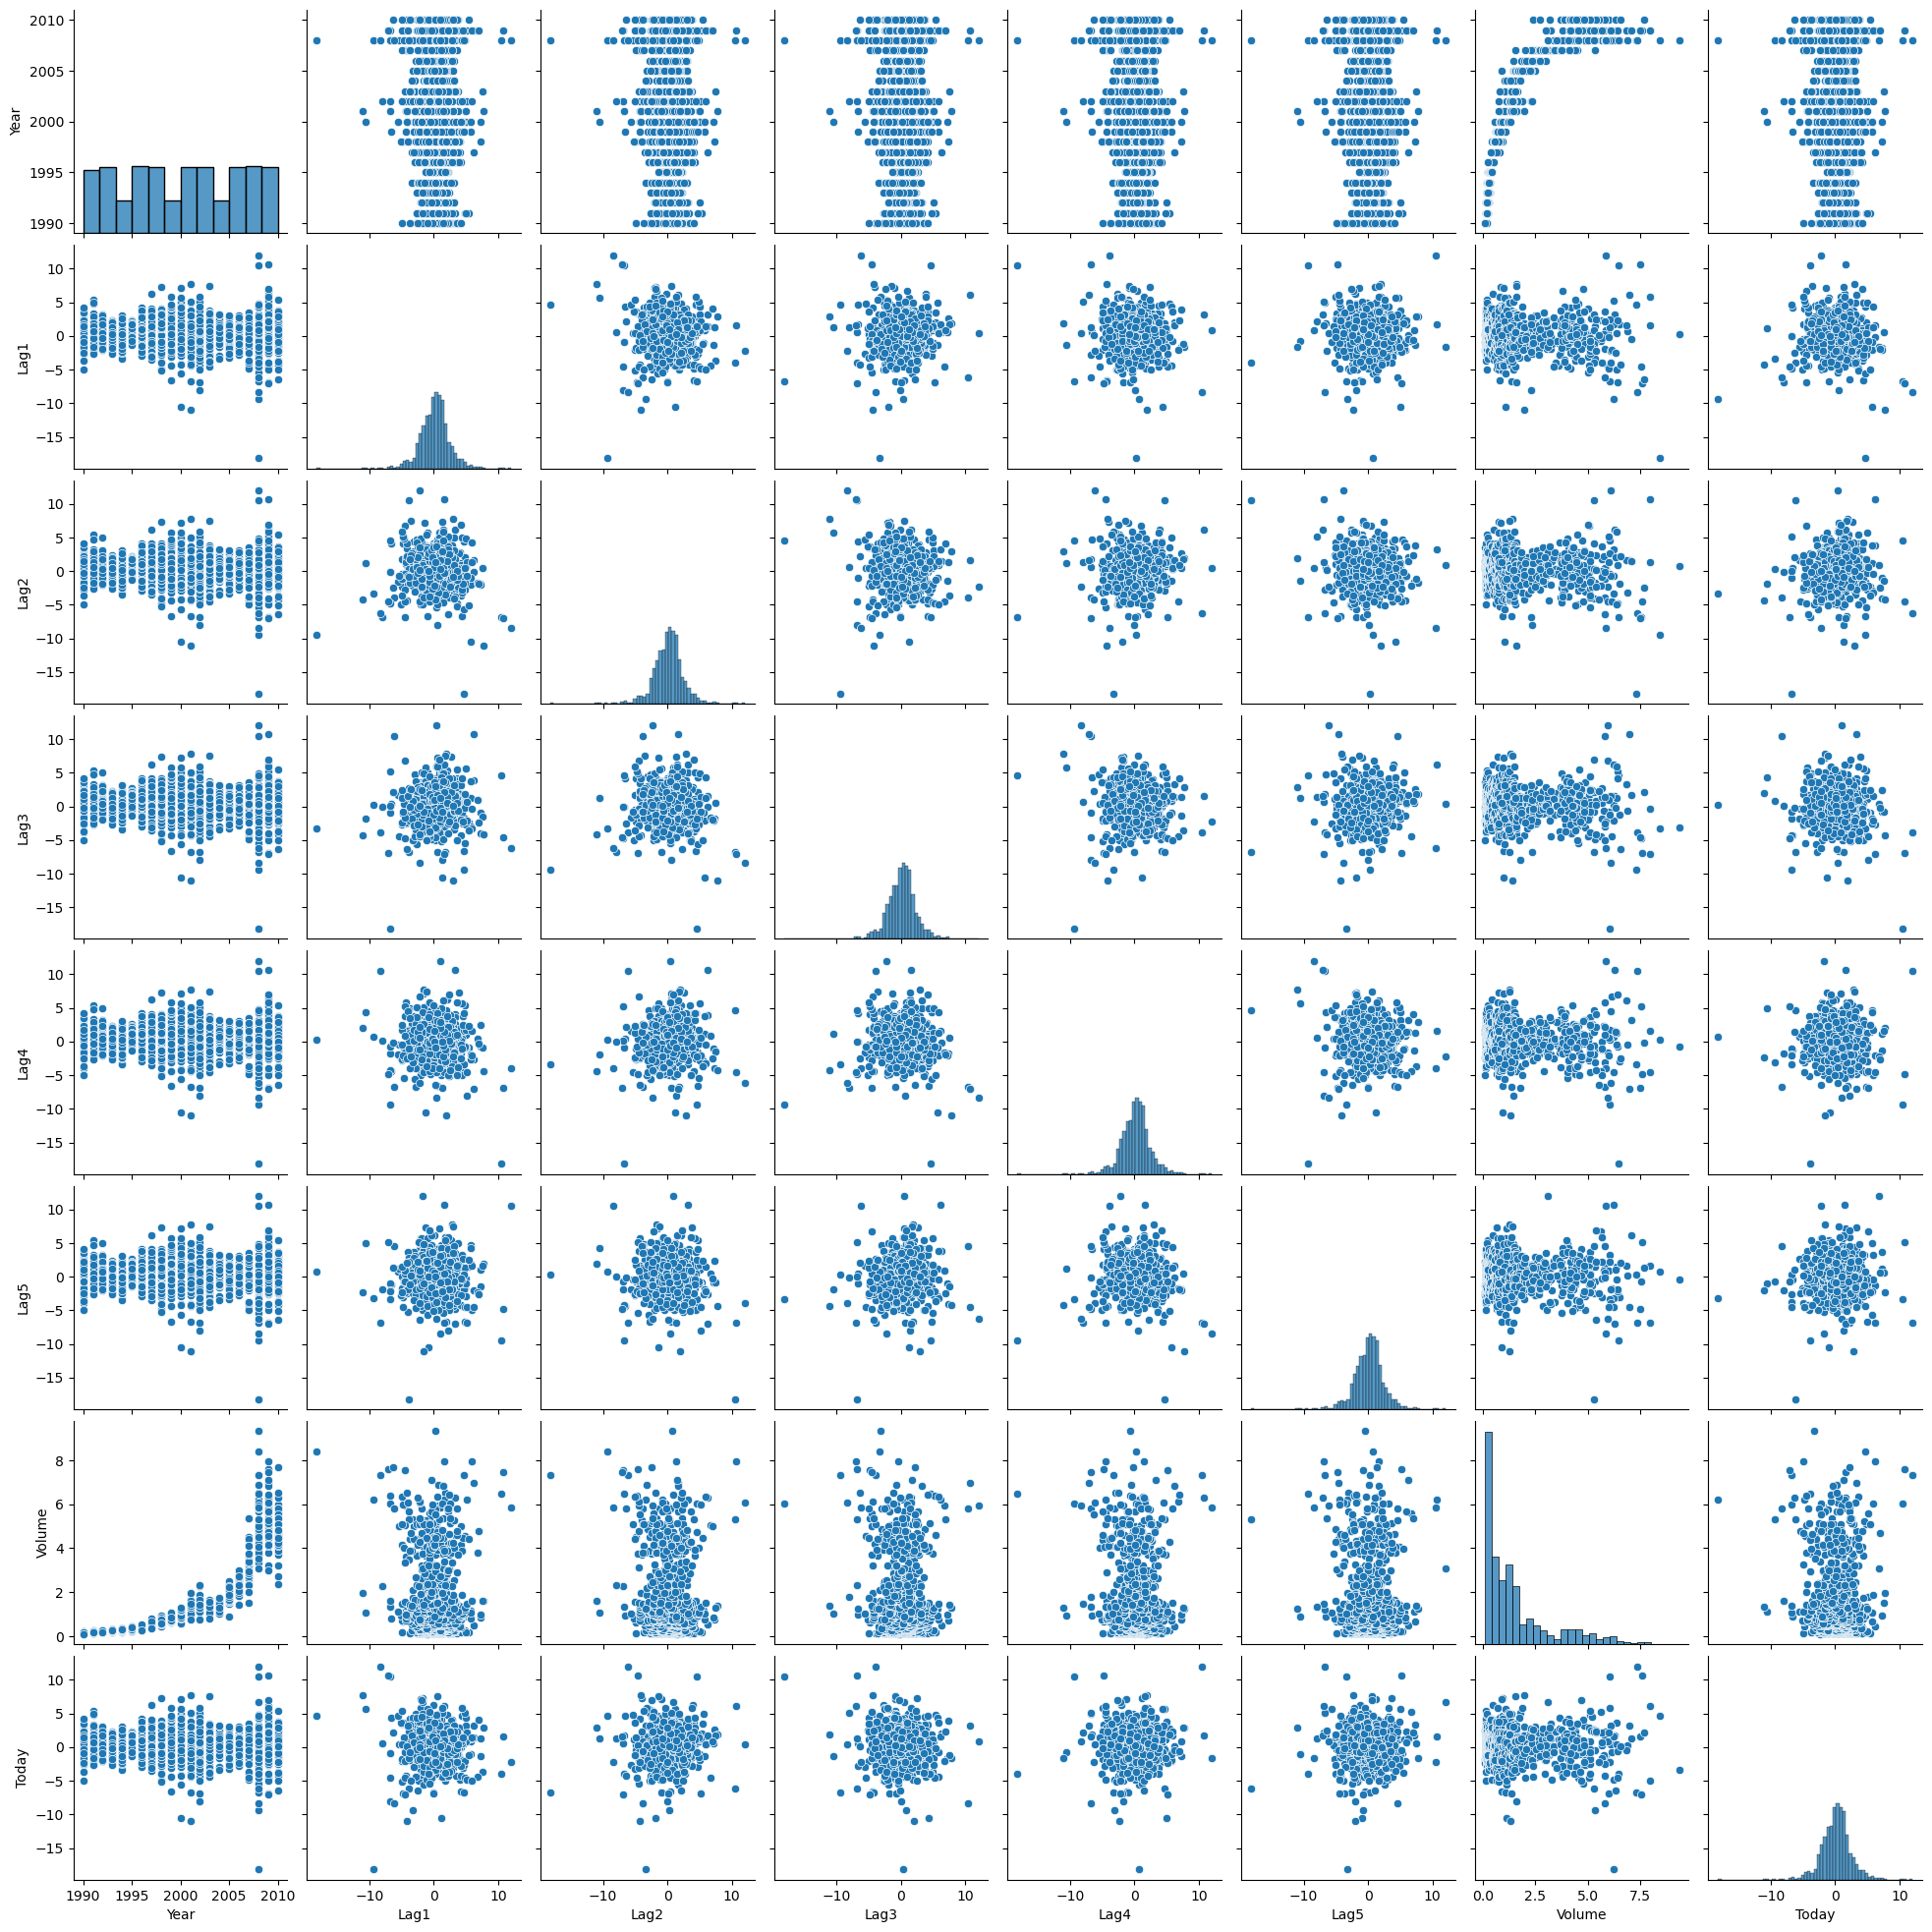

In [3]:
sns.pairplot(Weekly)
plt.show()

2. Correlation heatmap:

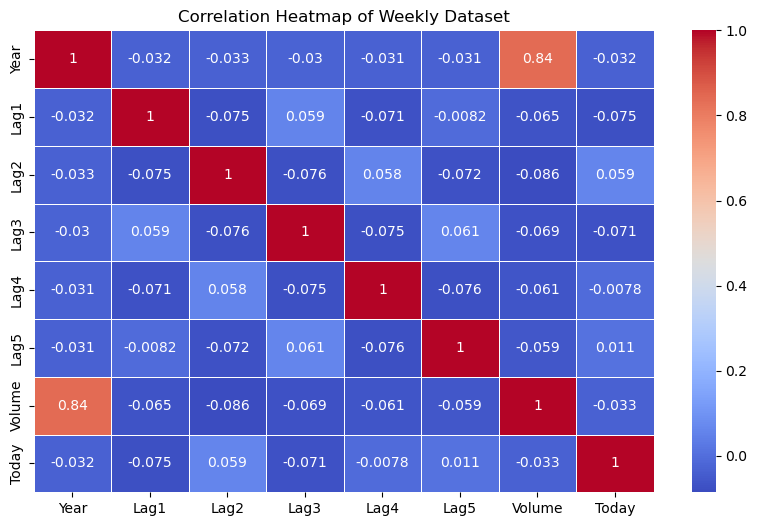

In [5]:
# Select only numeric columns for correlation calculation
numeric_data = Weekly.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Weekly Dataset")
plt.show()

From the above figures:

### Pairplot Observations:
- **Distribution of Lag Variables**: The pairplot suggests that each of the lagged return variables (`Lag1`, `Lag2`, etc.) appears to be centered around zero, indicating a relatively normal distribution. There aren't strong linear relationships between these lagged variables and the dependent variable (`Today`), implying that individual past weekly returns might not strongly predict future returns on their own.
- **Volume and Year**: There is a visible upward trend in trading volume over the years, indicating growth in trading activity over the time period covered in this dataset (1990-2010).

### Correlation Heatmap Observations:
- **Low Correlations Among Lagged Variables**: The heatmap shows that correlations among the lag variables (`Lag1` to `Lag5`) and `Today` are generally low, indicating weak relationships between lagged returns and the current week's return. This suggests limited predictive power of individual lagged returns for current returns in this dataset.
- **Volume Correlation**: The high correlation between `Volume` and `Year` suggests that trading volume consistently increased over the years, which aligns with broader market growth during this period.

### Conclusion:
There are a few key takeaways:
1. **Low Predictability**: The weak correlations between lagged returns and `Today` indicate that single-week past returns may not be highly predictive of future weekly returns in this dataset.
2. **Market Growth**: The increase in trading volume over time indicates a growing market or increasing investor participation from 1990 to 2010.

### Part(b)  
(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors.
Use the summary function to print the results. Do any of the predictors appear to be statistically significant?
If so, which ones?

In [6]:
import statsmodels.api as sm
import pandas as pd

# Convert Direction to binary (1 for 'Up', 0 for 'Down')
Weekly['Direction_binary'] = (Weekly['Direction'] == 'Up').astype(int)

# Define the independent variables (including the intercept)
X = Weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X = sm.add_constant(X)  # Adds an intercept term to the model

# Define the dependent variable
y = Weekly['Direction_binary']

# Perform logistic regression
logit_model = sm.Logit(y, X).fit()

# Print the summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Direction_binary   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                0.006580
Time:                        23:00:20   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

From the logistic regression results, let's interpret the findings:

### Summary of Results

1. **Statistical Significance**:
   - **Lag2** is statistically significant at the 5% level (p-value = 0.030). This suggests that the previous week's return (Lag2) has a statistically significant effect on predicting the market direction.
   - Other variables, such as Lag1, Lag3, Lag4, Lag5, and Volume, do not appear to be statistically significant, as their p-values are greater than 0.05.

2. **Intercept (Constant)**:
   - The intercept (const) is statistically significant with a p-value of 0.002. This suggests that even without the predictors, there is a significant baseline effect in predicting the market direction.

3. **Coefficient Interpretation**:
   - **Lag2** has a positive coefficient (0.0584), indicating that higher returns two weeks ago are associated with an increased likelihood of an "Up" market direction.
   - The coefficients of other lag variables and Volume are negative, but their lack of statistical significance suggests that these relationships may not be reliable.

### Conclusion
In this logistic regression model, only the variable **Lag2** appears to be statistically significant, indicating that it might have some predictive power for market direction. Other variables do not show significant predictive relationships in this context.

### Part(c)  
(c) Compute the confusion matrix and overall fraction of correct predictions.
Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions using the logistic regression model
# We use a threshold of 0.5 for classifying "Up" (1) or "Down" (0)
predicted_probabilities = logit_model.predict(X)
predicted_classes = (predicted_probabilities > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the overall accuracy
accuracy = accuracy_score(y, predicted_classes)
print(f"Overall Fraction of Correct Predictions: {accuracy:.2f}")

Confusion Matrix:
[[ 54 430]
 [ 48 557]]
Overall Fraction of Correct Predictions: 0.56


The confusion matrix indicates two main types of mistakes made by the logistic regression model:

1. **High Number of False Positives (430)**: The model frequently predicts the market as "Up" when it is actually "Down." This suggests the model is overly optimistic about predicting upward trends, leading to a lack of sensitivity to market declines.

2. **Lower Number of False Negatives (48)**: The model sometimes predicts the market as "Down" when it is actually "Up." This indicates that the model is somewhat better at identifying upward trends.

In summary, the model tends to incorrectly predict upward movements and struggles to identify downward trends, likely due to bias or insufficient feature selection.

### Part(d)  
(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor.
Compute the confusion matrix and the overall fraction of correct predictions for the held out data
(that is, the data from 2009 and 2010).

In [8]:
# Step 1: Split the data into training (1990-2008) and testing (2009-2010) periods
train_data = Weekly[Weekly['Year'] <= 2008]
test_data = Weekly[Weekly['Year'] > 2008]

# Step 2: Fit the logistic regression model on training data using Lag2 as the only predictor
X_train = train_data[['Lag2']]
X_train = sm.add_constant(X_train)  # Add an intercept
y_train = (train_data['Direction'] == 'Up').astype(int)

logit_model_lag2 = sm.Logit(y_train, X_train).fit()

# Step 3: Make predictions on the testing data (2009-2010)
X_test = test_data[['Lag2']]
X_test = sm.add_constant(X_test)  # Add an intercept
y_test = (test_data['Direction'] == 'Up').astype(int)

predicted_probabilities_test = logit_model_lag2.predict(X_test)
predicted_classes_test = (predicted_probabilities_test > 0.5).astype(int)

# Step 4: Calculate the confusion matrix and overall accuracy for the testing period
conf_matrix_test = confusion_matrix(y_test, predicted_classes_test)
accuracy_test = accuracy_score(y_test, predicted_classes_test)

# Print results
print("Confusion Matrix (2009-2010):")
print(conf_matrix_test)
print(f"Overall Fraction of Correct Predictions: {accuracy_test:.2f}")

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
Confusion Matrix (2009-2010):
[[ 9 34]
 [ 5 56]]
Overall Fraction of Correct Predictions: 0.62


The confusion matrix shows that the model correctly predicted the market 62% of the time, with:

- **9 True Negatives**: Correctly predicted "Down."
- **34 False Positives**: Predicted "Up" when it was actually "Down."
- **5 False Negatives**: Predicted "Down" when it was actually "Up."
- **56 True Positives**: Correctly predicted "Up."

The model tends to over-predict "Up" movements, resulting in more false positives.